# Benchmark ComBind

Explore performance as a function of number of ligands and temperature.

The raw data for this notebook should be prepared by running 1_dock/score_all.py, followed by visualization/extract_data/combind_sweep.py

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
rmsds = {}
with open('../../../combind_data/bpp_outputs/all_best_affinity/rmsds.csv') as fp:
    for line in fp:
        t, n, protein, ligand, best, glide, combind = line.strip().split(',')
        n = int(n.split('=')[1])
        t = float(t.split('=')[1])
        best, glide, combind = float(best), float(glide), float(combind)
        #if best > 2: continue
        if (n, t) not in rmsds: rmsds[(n, t)] = {}
        if protein not in rmsds[(n, t)]: rmsds[(n, t)][protein] = {}
        
        rmsds[(n, t)][protein][ligand] = (best, glide, combind)

In [28]:
for params, proteins in rmsds.items():
    for protein, ligands in proteins.items():
        del ligands[sorted(ligands.keys())[0]]

3 3.64268509099 3.63342039352
10 3.64268509099 3.87753229738
1 3.76796267369 3.7381752513
30 3.63416779775 3.55711007203
10 3.64268509099 3.4725098463
10 3.56706790703 3.49414721173
3 3.6561021149 3.46846864436
1 3.78181659876 3.67079892869
30 3.64268509099 3.42479239285
1 3.76796267369 3.76985197142
30 3.64251966023 3.63823562302
1 3.76796267369 3.67469642737
3 3.65801368487 3.65988771862
1 3.76796267369 3.6044985863
30 3.64251966023 3.78354127856
30 3.64251966023 3.98043563422
10 3.64268509099 3.6390200119
3 3.64268509099 3.64272119517
3 3.5761117525 3.56377455753
3 3.64268509099 3.513377927
1 3.71791778854 3.71893279241
10 3.64268509099 3.63465380258
10 3.64268509099 3.44373669757
10 3.64268509099 3.63671001082
30 3.64268509099 3.54886188883
1 3.78367426329 3.79349195364
3 3.64268509099 3.57088806754
30 3.60018642248 3.49806171343
{1: 0.16346408738860685, 10: 0.1989483934147258, 3: 0.18763347053846413, 30: 0.2178926981400804}


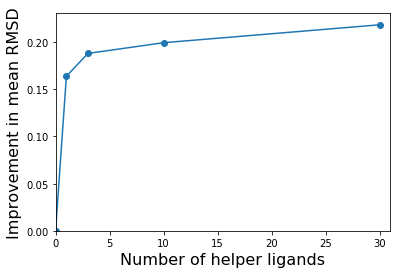

In [47]:
best = {}
for (n, t), proteins in rmsds.items():
    c = [combind for protein, ligands in proteins.items() for ligand, (_, glide, combind) in ligands.items()]
    g = [glide for protein, ligands in proteins.items() for ligand, (_, glide, combind) in ligands.items()]
    c = sum(c) / float(len(c))
    g = sum(g) / float(len(g))
    print n, g, c
    if n not in best: best[n] = 0
    if n in best and g-c > best[n]:
        best[n] = g-c
print best

plt.plot([0]+sorted(best.keys()), [0]+[best[n] for n in sorted(best.keys())])
plt.scatter([0]+sorted(best.keys()), [0]+[best[n] for n in sorted(best.keys())])
plt.ylim(0, .23)
plt.xlim(0, 31)
plt.ylabel('Improvement in mean RMSD', fontsize = 16)
plt.xlabel('Number of helper ligands', fontsize = 16)
plt.show()

[(1, 0.001), (1, 0.003), (1, 0.01), (1, 0.03), (1, 0.1), (1, 0.3), (1, 1.0), (3, 0.001), (3, 0.003), (3, 0.01), (3, 0.03), (3, 0.1), (3, 0.3), (3, 1.0), (10, 0.001), (10, 0.003), (10, 0.01), (10, 0.03), (10, 0.1), (10, 0.3), (10, 1.0), (30, 0.001), (30, 0.003), (30, 0.01), (30, 0.03), (30, 0.1), (30, 0.3), (30, 1.0)]


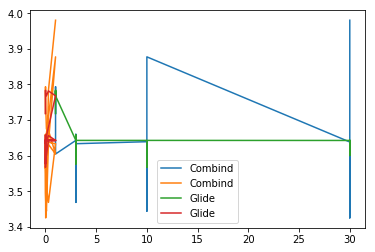

[457, 464, 461, 464, 464, 461, 464, 451, 448, 447, 451, 451, 448, 451, 451, 451, 444, 451, 451, 451, 451, 448, 448, 451, 451, 442, 448, 448]


In [29]:
from scipy.stats import ttest_rel

N = sorted(set([k for k in rmsds.keys()]))
print N

C, G, T = [], [], []

for i, n in enumerate(N):
    c, g = [], []
    for prot, ligs in rmsds[n].items():
        for lig, (best, glide, combind) in ligs.items():
            c += [combind]
            g += [glide]
    C += [sum(c) / float(len(c))]
    G += [sum(g) / float(len(g))]
    T += [len(c)]

plt.plot(N, C, label = 'Combind')
plt.plot(N, G, label = 'Glide')
plt.legend()
plt.show()

print T

Ttest_relResult(statistic=3.4220497548864706, pvalue=0.00067828166295059522)
Glide Average: 3.64268509099 0.456762749446
ComBind Average: 3.42479239285 0.474501108647


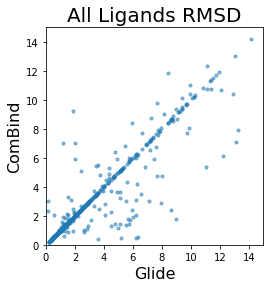

In [30]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in rmsds[(30, 0.03)].items():
    for lig, (best, glide, combind) in ligs.items():
        x += [glide]
        y += [combind]

print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))
# 3.67435312 with best_mcss.txt
# 3.64923135235 with best_affinity.txt

# 3.48206150403 with best_affinity.txt, t = 0.05 (Only improvements!!!)

In [7]:
x, y = np.array(x), np.array(y)

In [8]:
tol = 1
sum((y - x) > tol), sum((y - x) < -tol), sum(((y-x)<tol)*((y - x)>-tol))

(49, 69, 359)

3.37292925588 3.19362983899


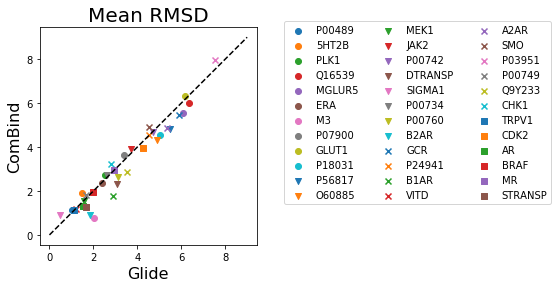

In [9]:
x, y, label = [], [], []
for prot, ligs in rmsds[10].items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05), ncol=3)
plt.show()

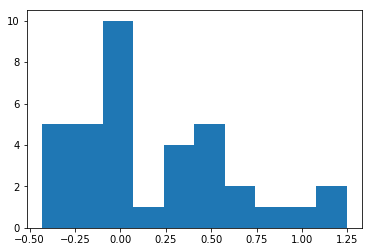

In [10]:
plt.hist(np.array(x) - np.array(y))
plt.show()

P00489 20
5HT2B 2
PLK1 12
Q16539 11
MGLUR5 5
ERA 20
M3 2
P07900 20
GLUT1 3
P18031 20
P56817 18
O60885 17
MEK1 17
JAK2 20
P00742 15
DTRANSP 9
SIGMA1 2
P00734 14
P00760 20
B2AR 8
GCR 18
P24941 13
B1AR 12
VITD 20
A2AR 18
SMO 7
P03951 14
P00749 20
Q9Y233 16
CHK1 20
TRPV1 2
CDK2 19
AR 11
BRAF 14
MR 13
STRANSP 5
0.504155378362 0.51842802868


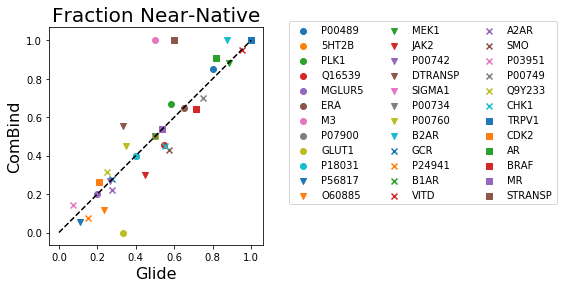

In [11]:
x, y = [], []
for prot, ligs in rmsds[10].items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide <= 2.0]
        _y += [combind <= 2.0]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05), ncol = 3)
plt.show()

(array([  1.,   1.,   0.,   1.,   3.,   5.,  19.,   5.,   0.,   1.]),
 array([-0.5       , -0.41666667, -0.33333333, -0.25      , -0.16666667,
        -0.08333333,  0.        ,  0.08333333,  0.16666667,  0.25      ,
         0.33333333]),
 <a list of 10 Patch objects>)

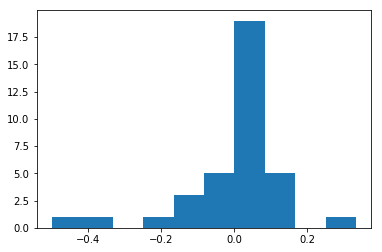

In [12]:
plt.hist(np.array(x) - np.array(y))